<a href="https://colab.research.google.com/github/Ananda0047/Bangla-Sentiment-Analysis/blob/main/Jaccard_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import itertools

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Final_Data.xlsx to Final_Data (1).xlsx


In [ ]:
import io
data = pd.read_excel(io.BytesIO(uploaded['Final_Data.xlsx']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
# Group the data by sentiment classes
grouped_data = data.groupby("Sentiment")["Text"].apply(list)

In [ ]:
# Print the grouped data
print(grouped_data)

Sentiment
anger       [অনেক আগ্রহ নিয়ে গ্লাসে চুমুক দিয়ে দেখিশরবতে...
disgust     [অই জায়গার ডাক্তাররা কি গু খায় কে পাগল কে সুস্...
fear        [অটো রিস্কা বন্ধ করতে হবে তা না হলে আরো সংকট ব...
joy         [অনেক অনেক ধন্যবাদ লেখাটি সংশোধন করার জন্য ভুল...
sadness     [অনেকদিন হলো তাকে দেখিনা মাঝে মাঝে কান্না আসে,...
surprise    [অনেক দেখি তো রাশিয়া থেকে তেল আমদানি করতেছে অ...
Name: Text, dtype: object


# **For all the words**

In [ ]:
# Create a new DataFrame to store the grouped words
grouped_words_data = pd.DataFrame(index=grouped_data.index, columns=["Words"])

# Extract and store the words for each sentiment class
for sentiment, sentences in grouped_data.items():
    words = [word.lower() for sentence in sentences for word in sentence.split()]
    grouped_words_data.loc[sentiment, "Words"] = words

# Print the dataset containing the grouped words
print(grouped_words_data)

                                                       Words
Sentiment                                                   
anger      [অনেক, আগ্রহ, নিয়ে, গ্লাসে, চুমুক, দিয়ে, দেখ...
disgust    [অই, জায়গার, ডাক্তাররা, কি, গু, খায়, কে, পাগল,...
fear       [অটো, রিস্কা, বন্ধ, করতে, হবে, তা, না, হলে, আর...
joy        [অনেক, অনেক, ধন্যবাদ, লেখাটি, সংশোধন, করার, জন...
sadness    [অনেকদিন, হলো, তাকে, দেখিনা, মাঝে, মাঝে, কান্ন...
surprise   [অনেক, দেখি, তো, রাশিয়া, থেকে, তেল, আমদানি, ক...


In [ ]:
# Assuming you have the grouped_words_data DataFrame with sentiment classes and their respective words

# Count the number of elements in each sentiment class
num_elements = grouped_words_data['Words'].apply(len)

# Print the number of elements for each sentiment class
print("Number of Elements by Sentiment Class:")
print(num_elements)

Number of Elements by Sentiment Class:
Sentiment
anger       8132
disgust     7779
fear        6101
joy         6875
sadness     7619
surprise    7696
Name: Words, dtype: int64


In [ ]:
import pandas as pd

# Assuming you have the grouped_words_data DataFrame with sentiment classes and their respective words

# Calculate Jaccard similarity for each pair of sentiment classes
similarity_matrix = pd.DataFrame(index=grouped_words_data.index, columns=grouped_words_data.index)
for i in grouped_words_data.index:
    for j in grouped_words_data.index:
        if i == j:
            similarity_matrix.loc[i, j] = 1.0  # Jaccard similarity of a class with itself is 1
        else:
            set_i = set(grouped_words_data.loc[i, "Words"])
            set_j = set(grouped_words_data.loc[j, "Words"])
            intersection = len(set_i.intersection(set_j))
            union = len(set_i.union(set_j))
            if union == 0:
                similarity_matrix.loc[i, j] = 0.0  # If union is 0, set the similarity to 0 to avoid division by zero
            else:
                similarity = intersection / union
                similarity_matrix.loc[i, j] = similarity

# Print the similarity matrix
print(similarity_matrix)


Sentiment     anger   disgust      fear       joy   sadness  surprise
Sentiment                                                            
anger           1.0  0.218031  0.234684  0.177108  0.188099  0.168952
disgust    0.218031       1.0  0.171363   0.17603  0.179986  0.167836
fear       0.234684  0.171363       1.0  0.201581  0.220419   0.17087
joy        0.177108   0.17603  0.201581       1.0    0.1801  0.162282
sadness    0.188099  0.179986  0.220419    0.1801       1.0  0.161594
surprise   0.168952  0.167836   0.17087  0.162282  0.161594       1.0


In [ ]:
similarity_matrix.to_excel("Jaccard Similarity of all words.xlsx",index=True)

# **For most frequent 200 words**

In [ ]:
import pandas as pd

# Assuming you have the grouped_words_data DataFrame with sentiment classes and their respective words

# Define the number of most frequent words to extract
num_most_frequent = 200

# Create a new DataFrame to store the most frequent words
most_frequent_words_data = pd.DataFrame(index=grouped_words_data.index, columns=["Words"])

# Iterate over each sentiment class
for sentiment, words in grouped_words_data["Words"].items():
    # Calculate word frequency using Python's built-in collections.Counter
    word_frequency = pd.Series(words).value_counts()

    # Extract the most frequent words
    most_frequent = word_frequency.head(num_most_frequent).index.tolist()

    # Store the most frequent words for the sentiment class
    most_frequent_words_data.loc[sentiment, "Words"] = most_frequent

# Print the DataFrame
print(most_frequent_words_data)


                                                       Words
Sentiment                                                   
anger      [রাগ, না, আমার, তার, সে, করে, এই, আমি, তাই, আর...
disgust    [বিরক্ত, ছিঃ, না, এই, করে, কি, বিরক্তিকর, আমি,...
fear       [ভয়, না, সে, তার, আমি, হয়, তাকে, তাই, আমার, হচ...
joy        [ধন্যবাদ, জন্য, আপনার, অনেক, ভাই, ভাল, আপনাদের...
sadness    [কষ্ট, না, তার, আমার, আমি, সে, আমাকে, করে, দুঃ...
surprise   [আমি, এই, আশ্চর্য, না, বিস্মিত, কি, একটি, এটা,...


In [ ]:
# Assuming you have the grouped_words_data DataFrame with sentiment classes and their respective words

# Count the number of elements in each sentiment class
num_elements = most_frequent_words_data['Words'].apply(len)

# Print the number of elements for each sentiment class
print("Number of Elements by Sentiment Class:")
print(num_elements)

Number of Elements by Sentiment Class:
Sentiment
anger       200
disgust     200
fear        200
joy         200
sadness     200
surprise    200
Name: Words, dtype: int64


In [ ]:
import pandas as pd

# Assuming you have the most_frequent_words_data DataFrame with sentiment classes and their respective most frequent words

# Calculate Jaccard similarity for each pair of sentiment classes
similarity_matrix = pd.DataFrame(index=most_frequent_words_data.index, columns=most_frequent_words_data.index)
for i in most_frequent_words_data.index:
    for j in most_frequent_words_data.index:
        if i == j:
            similarity_matrix.loc[i, j] = 1.0  # Jaccard similarity of a class with itself is 1
        else:
            set_i = set(most_frequent_words_data.loc[i, "Words"])
            set_j = set(most_frequent_words_data.loc[j, "Words"])
            intersection = len(set_i.intersection(set_j))
            union = len(set_i.union(set_j))
            if union == 0:
                similarity_matrix.loc[i, j] = 0.0  # If union is 0, set the similarity to 0 to avoid division by zero
            else:
                similarity = intersection / union
                similarity_matrix.loc[i, j] = similarity

# Print the similarity matrix
print(similarity_matrix)


Sentiment     anger   disgust      fear       joy   sadness  surprise
Sentiment                                                            
anger           1.0  0.351351   0.37931  0.257862  0.342282  0.282051
disgust    0.351351       1.0  0.294498  0.277955  0.342282  0.294498
fear        0.37931  0.294498       1.0   0.26183  0.346801   0.26183
joy        0.257862  0.277955   0.26183       1.0  0.273885  0.208459
sadness    0.342282  0.342282  0.346801  0.273885       1.0      0.25
surprise   0.282051  0.294498   0.26183  0.208459      0.25       1.0


In [ ]:
similarity_matrix.to_excel("Jaccard Similarity of frequent 200 words.xlsx",index=True)

# **Plots**

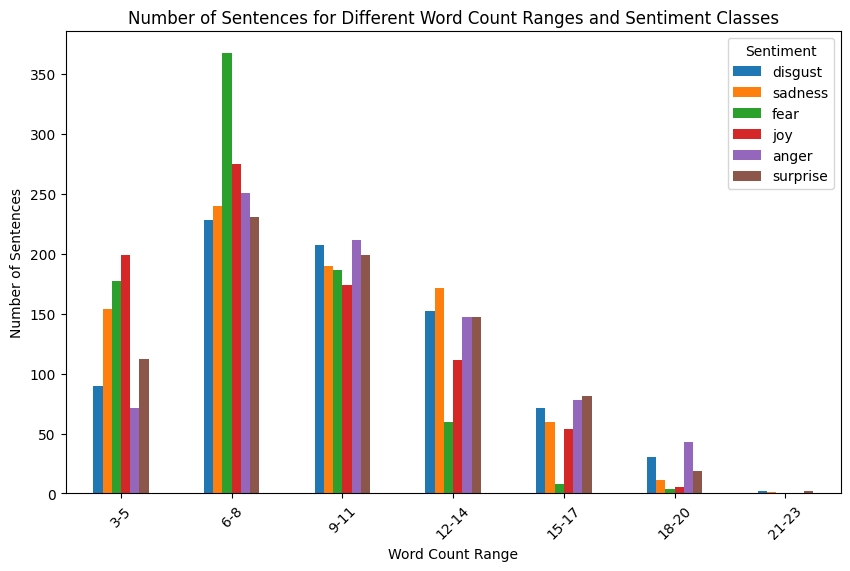

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the original dataset with columns "Text" and "Sentiment"
# Assuming the dataset is stored in a DataFrame named "data"

# Function to count the number of words in a sentence
def count_words(sentence):
    words = sentence.split()
    return len(words)

# Count the number of words in each sentence
data['WordCount'] = data['Text'].apply(count_words)

# Define the word count ranges
word_count_ranges = [(3, 5), (6, 8), (9, 11), (12, 14), (15, 17), (18, 20), (21, 23)]

# Initialize a dictionary to store the sentence counts for each sentiment class and word count range
sentence_counts = {sentiment: [] for sentiment in data['Sentiment'].unique()}

# Iterate over the sentiment classes
for sentiment in sentence_counts.keys():
    # Iterate over the word count ranges
    for count_range in word_count_ranges:
        # Count the sentences within the word count range and sentiment class
        count = data[(data['Sentiment'] == sentiment) & (data['WordCount'].between(*count_range))].shape[0]
        sentence_counts[sentiment].append(count)

# Convert the sentence counts dictionary to a DataFrame
df_sentence_counts = pd.DataFrame.from_dict(sentence_counts)

# Set the x-axis labels as the word count ranges
x_labels = [f"{count_range[0]}-{count_range[1]}" for count_range in word_count_ranges]

# Plot the bar plot
ax = df_sentence_counts.plot(kind='bar', figsize=(10, 6))
ax.set_xticklabels(x_labels, rotation=45)
ax.set_xlabel("Word Count Range")
ax.set_ylabel("Number of Sentences")
ax.set_title("Number of Sentences for Different Word Count Ranges and Sentiment Classes")
plt.legend(title="Sentiment")
plt.show()
